In [5]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
df.shape

(253680, 22)

In [8]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


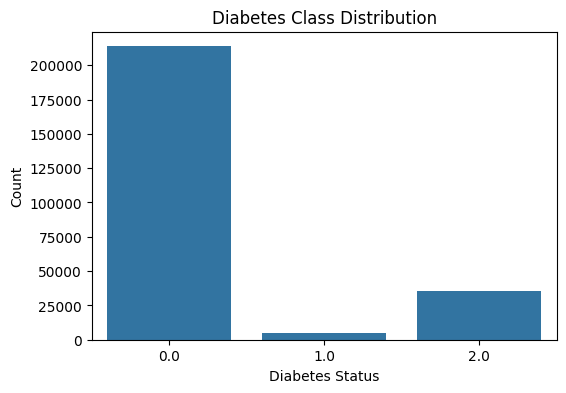

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_012', data=df)
plt.title("Diabetes Class Distribution")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.show()


In [12]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


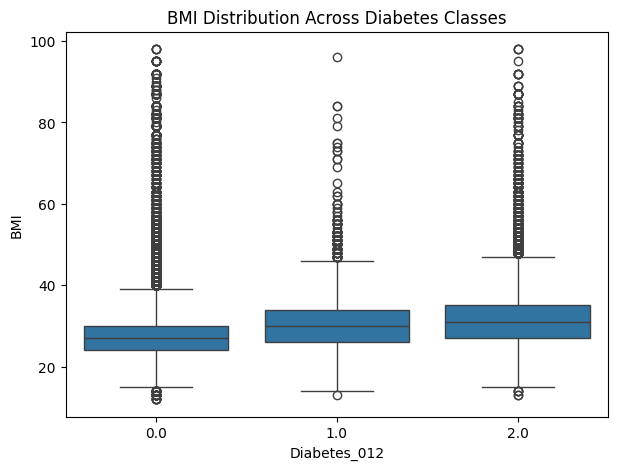

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title("BMI Distribution Across Diabetes Classes")
plt.show()


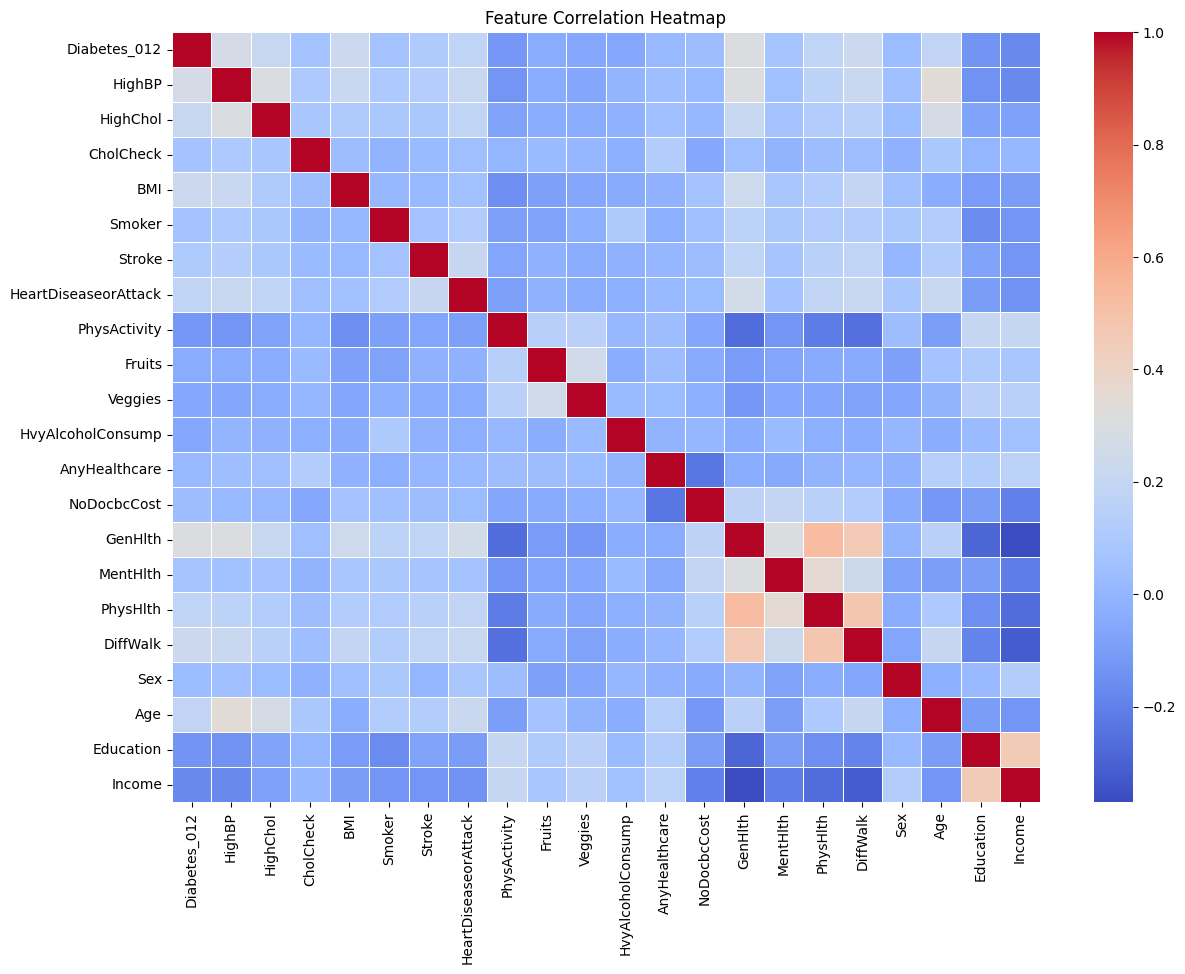

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
df_binary = df.copy()

df_binary['Diabetes_binary'] = df_binary['Diabetes_012'].apply(
    lambda x: 0 if x == 0 else 1
)

df_binary.drop('Diabetes_012', axis=1, inplace=True)

df_binary.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0


In [17]:
df_binary['Diabetes_binary'].value_counts()


,count
Diabetes_binary,
0,213703
1,39977


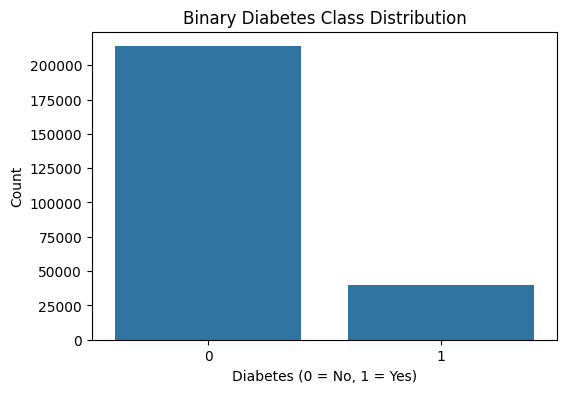

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_binary', data=df_binary)
plt.title("Binary Diabetes Class Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [19]:
X = df_binary.drop('Diabetes_binary', axis=1)
y = df_binary['Diabetes_binary']

X.shape, y.shape


((253680, 21), (253680,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression (Baseline Model)

In [22]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)


In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))


Accuracy: 0.730388678650268
Precision: 0.3407486271433374
Recall: 0.7606003752345216
F1 Score: 0.4706474207654502


In [24]:
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42741
           1       0.34      0.76      0.47      7995

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736



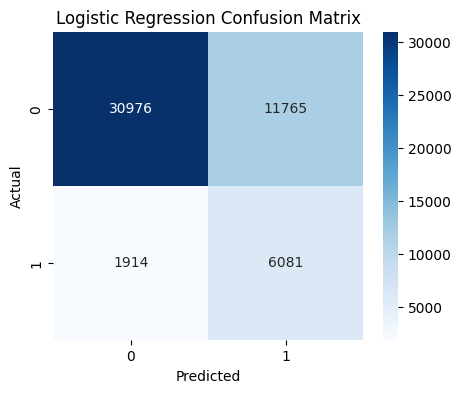

In [25]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Random Forest (Power Model)

In [26]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Accuracy: 0.8406259854935352
Precision: 0.4858211280772826
Recall: 0.19499687304565352
F1 Score: 0.2782934666190646


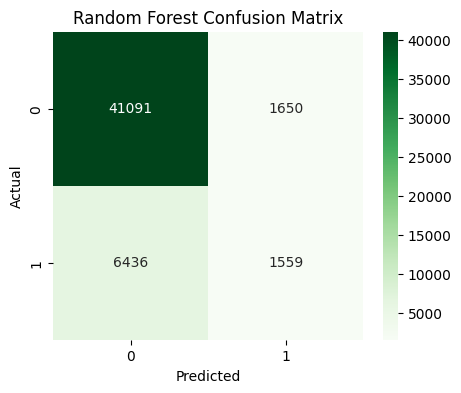

In [28]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


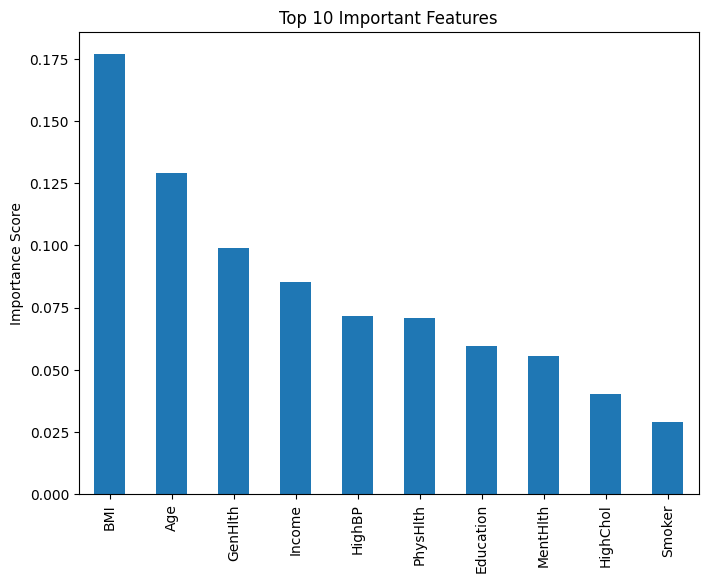

In [29]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.show()


In [30]:
sample_input = {
    'HighBP': 1,
    'HighChol': 1,
    'CholCheck': 1,
    'BMI': 32,
    'Smoker': 1,
    'Stroke': 0,
    'HeartDiseaseorAttack': 0,
    'PhysActivity': 0,
    'Fruits': 0,
    'Veggies': 1,
    'HvyAlcoholConsump': 0,
    'AnyHealthcare': 1,
    'NoDocbcCost': 0,
    'GenHlth': 3,
    'MentHlth': 2,
    'PhysHlth': 5,
    'DiffWalk': 0,
    'Sex': 1,
    'Age': 9,
    'Education': 4,
    'Income': 5
}


In [31]:
input_df = pd.DataFrame([sample_input])
input_df


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,32,1,0,0,0,0,1,...,1,0,3,2,5,0,1,9,4,5


In [32]:
prediction = rf_model.predict(input_df)[0]
probability = rf_model.predict_proba(input_df)[0][1]


In [33]:
if prediction == 1:
    print("⚠️ High Risk of Diabetes")
else:
    print("✅ Low Risk of Diabetes")

print(f"Risk Probability: {probability:.2f}")


✅ Low Risk of Diabetes
Risk Probability: 0.40


In [34]:
import joblib

joblib.dump(rf_model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [35]:
loaded_model = joblib.load("diabetes_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

loaded_prediction = loaded_model.predict(input_df)[0]
loaded_prediction


0

# GradientBoostingClassifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

import joblib



In [37]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

In [38]:
y_pred = gb_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42741
           1       0.58      0.21      0.31      7995

    accuracy                           0.85     50736
   macro avg       0.72      0.59      0.61     50736
weighted avg       0.82      0.85      0.82     50736



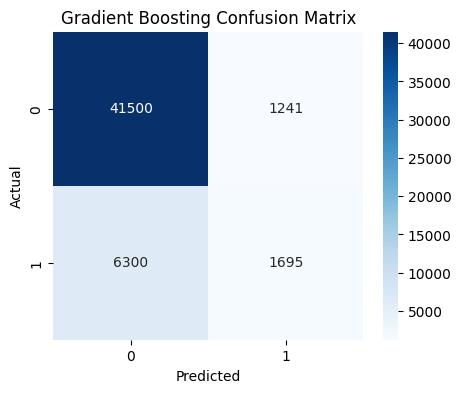

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


In [43]:
joblib.dump(gb_model, "diabetes_model1.pkl", compress=3, protocol=4)
joblib.dump(scaler, "scaler.pkl", compress=3, protocol=4)


['scaler.pkl']

In [46]:
# ---------- SAMPLE INPUT 1 (HIGH RISK) ----------
sample_high_risk = pd.DataFrame([[
    1, 1, 1, 34, 1, 0,
    1, 0, 0, 0,
    0, 1, 0, 4,
    6, 10, 1, 1,
    10, 3, 3
]], columns=X.columns)

prob_high = gb_model.predict_proba(sample_high_risk)[0][1]
print("High Risk Probability:", round(prob_high, 2))


# ---------- SAMPLE INPUT 2 (LOW RISK) ----------
sample_low_risk = pd.DataFrame([[
    0, 0, 1, 22, 0, 0,
    0, 1, 1, 1,
    0, 1, 0, 1,
    0, 0, 0, 0,
    3, 5, 7
]], columns=X.columns)

prob_low = gb_model.predict_proba(sample_low_risk)[0][1]
print("Low Risk Probability:", round(prob_low, 2))


High Risk Probability: 0.68
Low Risk Probability: 0.01


In [45]:
from google.colab import files

files.download("diabetes_model1.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import pandas as pd

test_case = pd.DataFrame([[
    1, 1, 1, 34, 1, 0,
    1, 0, 0, 0,
    0, 1, 0, 4,
    6, 10, 1, 1,
    10, 3, 3
]], columns=X.columns)

prob = gb_model.predict_proba(test_case)[0][1]
print("Diabetes Risk Probability:", round(prob, 2))


Diabetes Risk Probability: 0.68
